In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import pandas as pd

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [2]:
df = pd.read_csv("fashion-mnist_test.csv")
X, y = df.drop("label", axis=1), df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

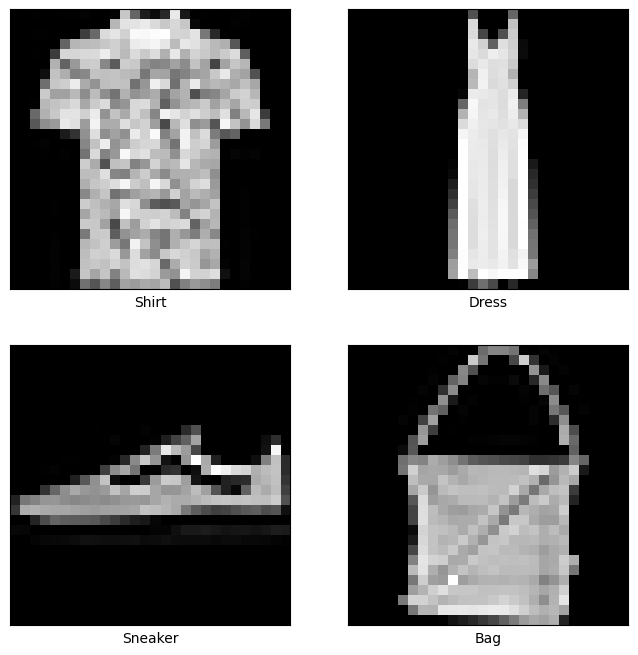

In [3]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot", ]

plt.figure(figsize=(8, 8))
for pos, idx in enumerate(range(4, 8)):
    plt.subplot(2, 2, pos + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train.values[idx].reshape(28, 28) * (100 / 255), cmap=plt.cm.gray)
    plt.xlabel(class_labels[y_train.values[idx]])
plt.show()

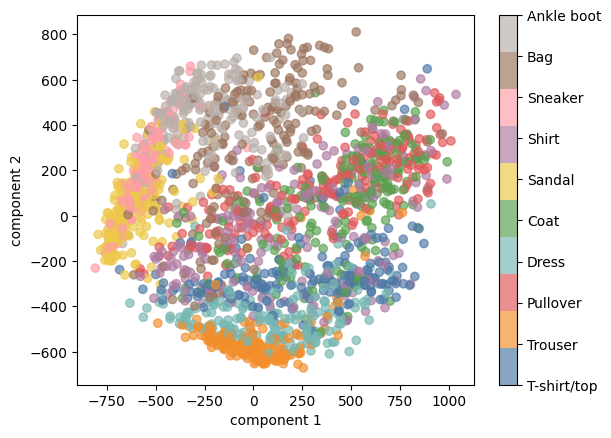

In [4]:
pca = PCA(n_components=2)
projected = pca.fit_transform(X_test * (100 / 255))

cmap = ListedColormap(
    colors=["#4e79a7FF", "#f28e2cFF", "#e15759FF", "#76b7b2FF", "#59a14fFF",
            "#edc949FF", "#af7aa1FF", "#ff9da7FF", "#9c755fFF", "#bab0abFF",]
)

plt.scatter(projected[:, 0], projected[:, 1], c=y_test, alpha=0.67, cmap=cmap)
plt.xlabel("component 1")
plt.ylabel("component 2")

cbar = plt.colorbar(ticks=range(10))
cbar.ax.set_yticklabels(class_labels)
plt.show()